Importing Libraries

In [1]:
# Importing Libaries

# import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pyforest


Data Collection
- Import data to jupyter notebook
- Pandas for data manipulation

In [3]:
# read CSV file
data = pd.read_csv("data.csv") 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [5]:
data.shape

(647, 20)

In [6]:
# rows of data...
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [7]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
# Check missing values
data.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [9]:
# Check unique values
data.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [10]:
# Find unique columns with unique values
unique_columns = data.columns[data.nunique() == len(data)]
print("Unique columns with unique values:")
print(unique_columns)

Unique columns with unique values:
Index(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID',
       'IP_Address'],
      dtype='object')


In [11]:
# Droping ID columns as they do not add any value to the analysis
data.drop(columns=['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID','IP_Address'], axis=1, inplace=True)

In [12]:
# Date column
data['Date'].head()

0    20/04/23
1    08/08/23
2    25/06/23
3    28/01/24
4    21/06/23
Name: Date, dtype: object

In [13]:
# Converting Date column to datetime
data['Date']=pd.to_datetime(data['Date'],format='%d/%m/%y')

In [14]:
# Extracting year from date
data['Year'] = data['Date'].dt.year

In [15]:
# Extracting month from date
data['Month']= data['Date'].dt.month

# Now month needs to be in MMM format

In [16]:
# Checking columns
data.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [17]:
# First 5 rows
data.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [18]:
# Checking the unique values in the month column
data['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [19]:
# Assigning Names to the months for better readability

months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [20]:
    # Map the 'Month' column values to their corresponding month names
data['Month'] = data['Month'].map(months)


In [21]:
# Descriptive statistics for numerical variables
numerical_stats = data.describe().T
print("Descriptive statistics for numerical variables:")
numerical_stats

Descriptive statistics for numerical variables:


,count,mean,min,25%,50%,75%,max,std
Date,647,2023-10-14 17:32:44.142194944,2023-04-14 00:00:00,2023-07-22 00:00:00,2023-10-15 00:00:00,2024-01-09 00:00:00,2024-04-11 00:00:00,NaN
Transaction_Frequency,647.0,3.564142,0.0,1.0,2.0,3.0,50.0,6.454543
Transaction_Amount_Deviation,647.0,5.014668,-99.47,-42.355,8.38,52.29,99.45,56.375914
Days_Since_Last_Transaction,647.0,15.717156,1.0,8.5,16.0,23.0,29.0,8.218122
amount,647.0,128.839753,0.12,17.155,35.0,74.77,4883.62,364.995747
fraud,647.0,0.239567,0.0,0.0,0.0,0.0,1.0,0.42715
Year,647.0,2023.281298,2023.0,2023.0,2023.0,2024.0,2024.0,0.449981


Inference:
  Transaction Frequency:
            Users, on average, make around 4 transactions.
            The number of transactions per user varies widely, from 0 to 90.
            
  Transaction Amount Deviation:
            The average deviation from expected transaction amounts is very low, around 0.04.
            However, this deviation varies greatly, from -100 to 99.99.
            
  Days Since Last Transaction:
             On average, users make a transaction every 15 days.
             The time since the last transaction ranges from 1 day to 29 days.
             
  Amount:
             On average, transaction amounts are around 40 units.
             Transaction amounts range from 0 to 7432.48 units.
             
  Fraud:
             Only around 1.5% of transactions are fraudulent.
             
  Year:
             The data mainly spans the year 2023, with a small portion from 2024.

In [22]:
# Distribution of target variable
data['fraud'].value_counts(normalize=True)*100


fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

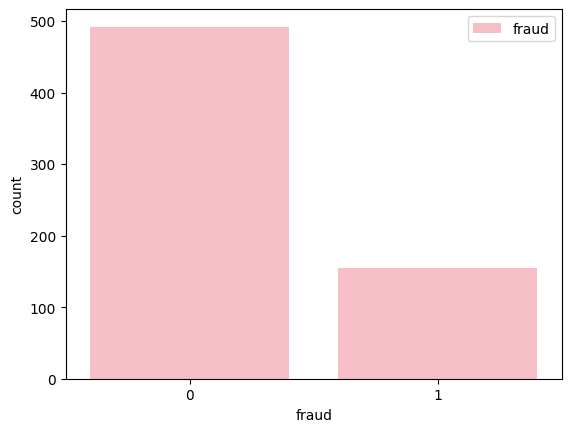

In [23]:
# Distribution of target variable
sns.countplot(x='fraud', data=data,color='lightpink', label= 'fraud')

In [24]:
# Create separate DataFrames for normal and fraudulent transactions
normal = data[data['fraud'] == 0]
fraud = data[data['fraud'] == 1]

In [25]:
fraud.shape

(155, 17)

In [26]:
# Check the fraud DataFrame
fraud.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [27]:
fraud.dtypes

Date                            datetime64[ns]
Time                                    object
Transaction_Type                        object
Payment_Gateway                         object
Transaction_City                        object
Transaction_State                       object
Transaction_Status                      object
Device_OS                               object
Transaction_Frequency                    int64
Merchant_Category                       object
Transaction_Channel                     object
Transaction_Amount_Deviation           float64
Days_Since_Last_Transaction              int64
amount                                 float64
fraud                                    int64
Year                                     int32
Month                                   object
dtype: object

In [28]:
fraud['Date'] = fraud['Date'].astype(object)
data['Date'] = data['Date'].astype(object)

In [29]:
fraud.dtypes

Date                             object
Time                             object
Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

In [30]:
# Describe the fraud DataFrame
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,155.0,4.116129,8.139973,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,155.0,1.662581,57.663342,-97.77,-45.240,3.58,48.58,99.28
Days_Since_Last_Transaction,155.0,16.045161,7.997030,1.00,9.000,17.00,22.50,29.00
amount,155.0,422.772710,642.515123,3.77,138.775,272.16,469.32,4883.62
fraud,155.0,1.000000,0.000000,1.00,1.000,1.00,1.00,1.00
Year,155.0,2023.296774,0.458317,2023.00,2023.000,2023.00,2024.00,2024.00


In [31]:
# Correlation check for entire dataset

numeric_columns_df = data.select_dtypes(include=['int64','float64'])

In [32]:
corr= numeric_columns_df.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.045265,0.027643,-0.009595,0.048038
Transaction_Amount_Deviation,0.045265,1.000000,0.004454,-0.023976,-0.033400
Days_Since_Last_Transaction,0.027643,0.004454,1.000000,0.034215,0.022420
amount,-0.009595,-0.023976,0.034215,1.000000,0.452355
fraud,0.048038,-0.033400,0.022420,0.452355,1.000000


In [33]:
# Correlation check for fraud dataset

numeric_columns = fraud.select_dtypes(include=['int64','float64'])

In [34]:
corr= numeric_columns.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN
amount,-0.047628,-0.034097,0.078918,1.000000,NaN
fraud,NaN,NaN,NaN,NaN,NaN


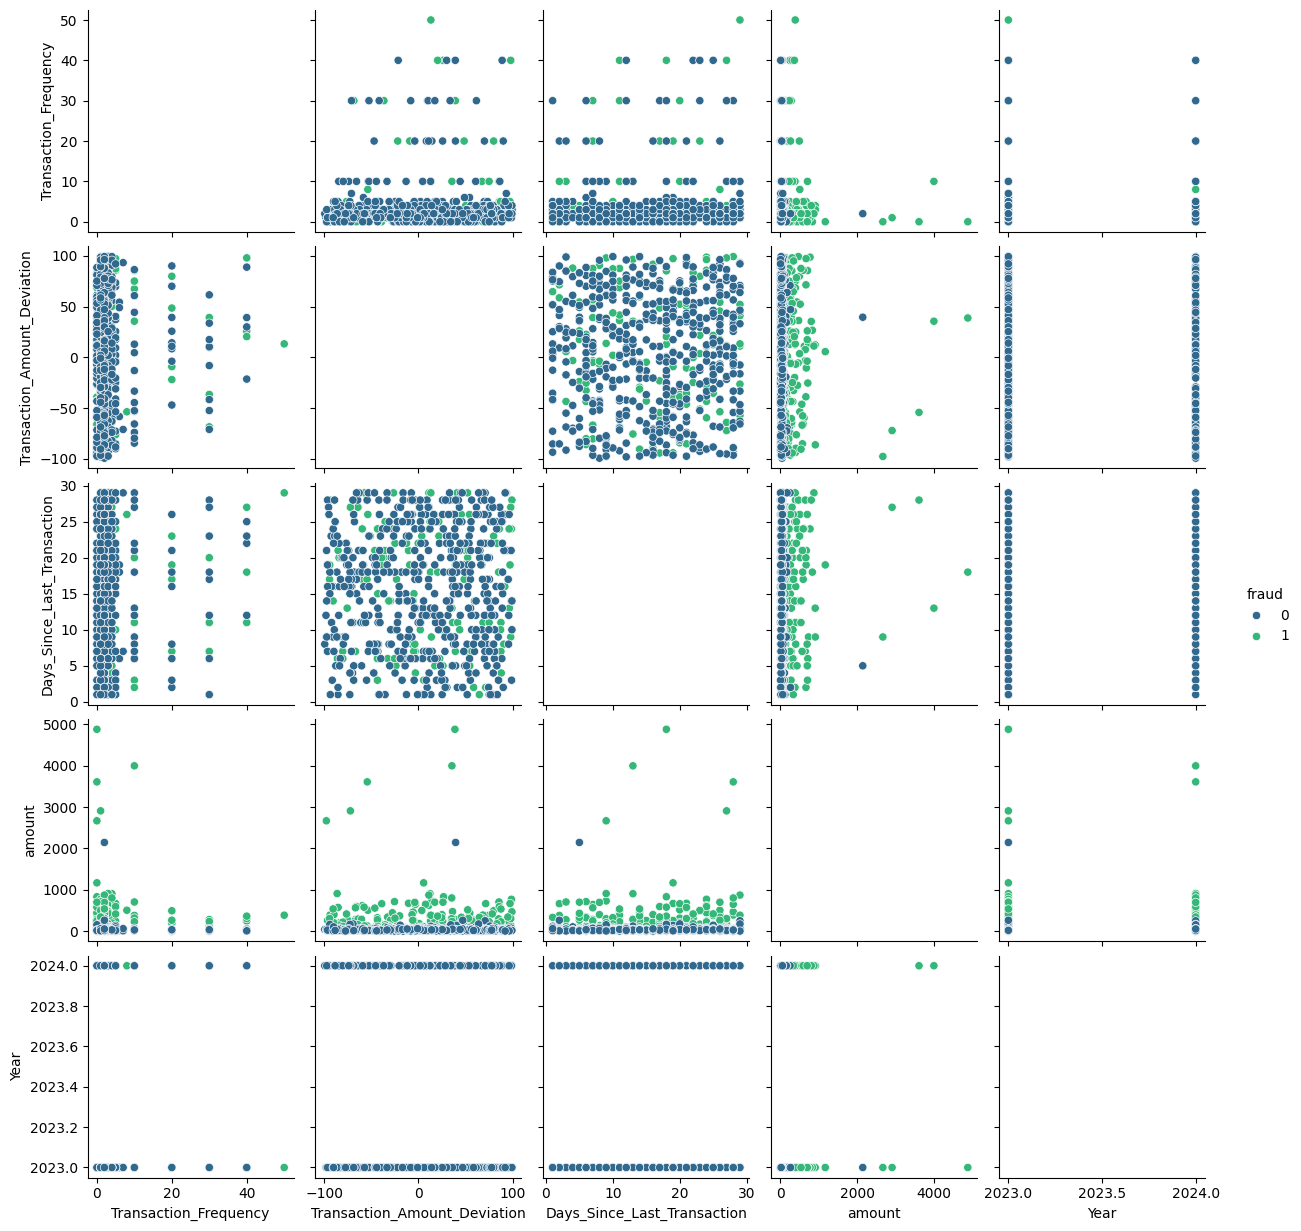

In [35]:
# Visualizing different features basis the fraud occurence as a subplot

sns.pairplot(data=data,hue='fraud',palette='viridis', diag_kind='dist')

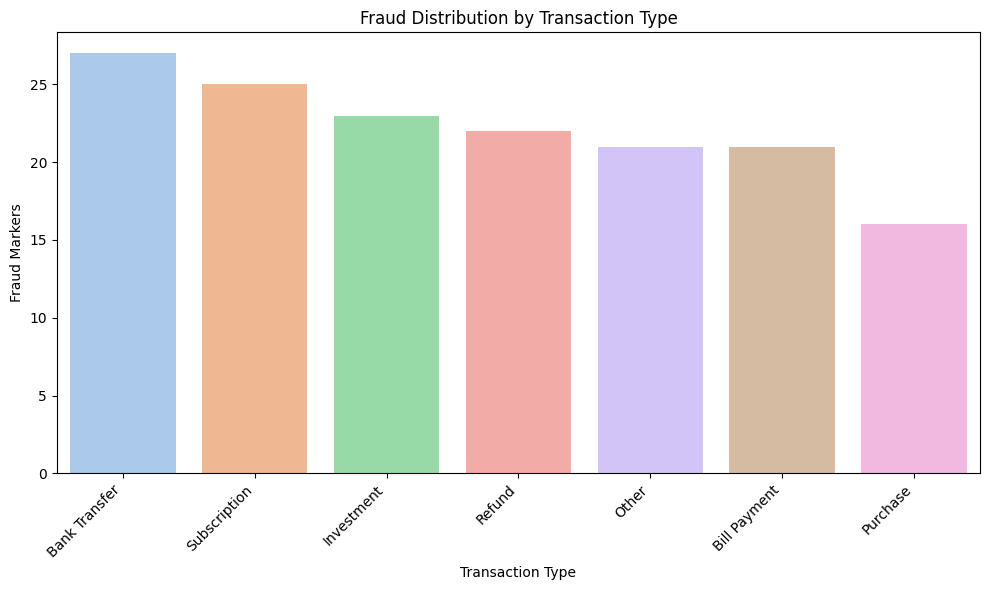

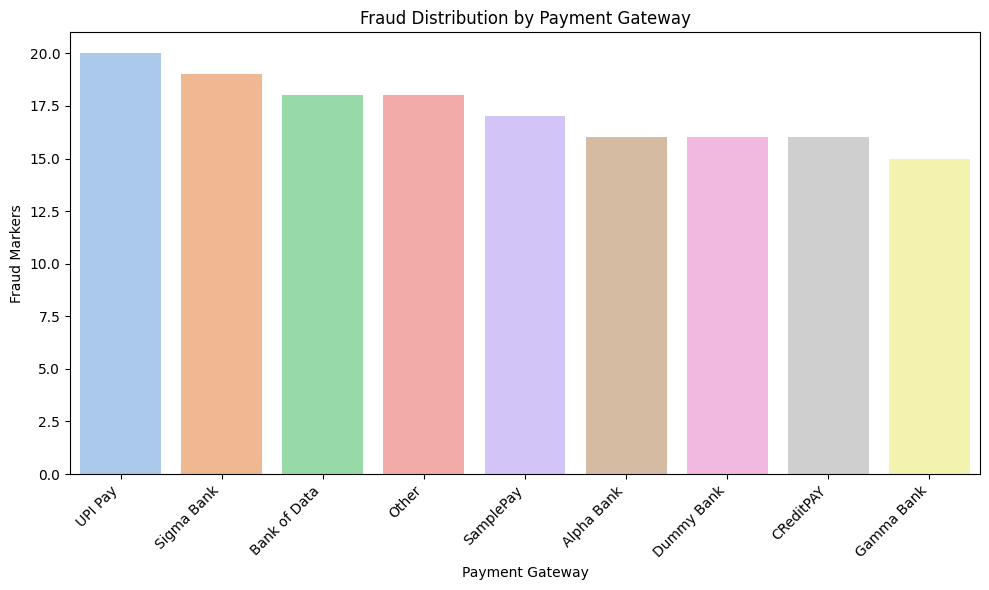

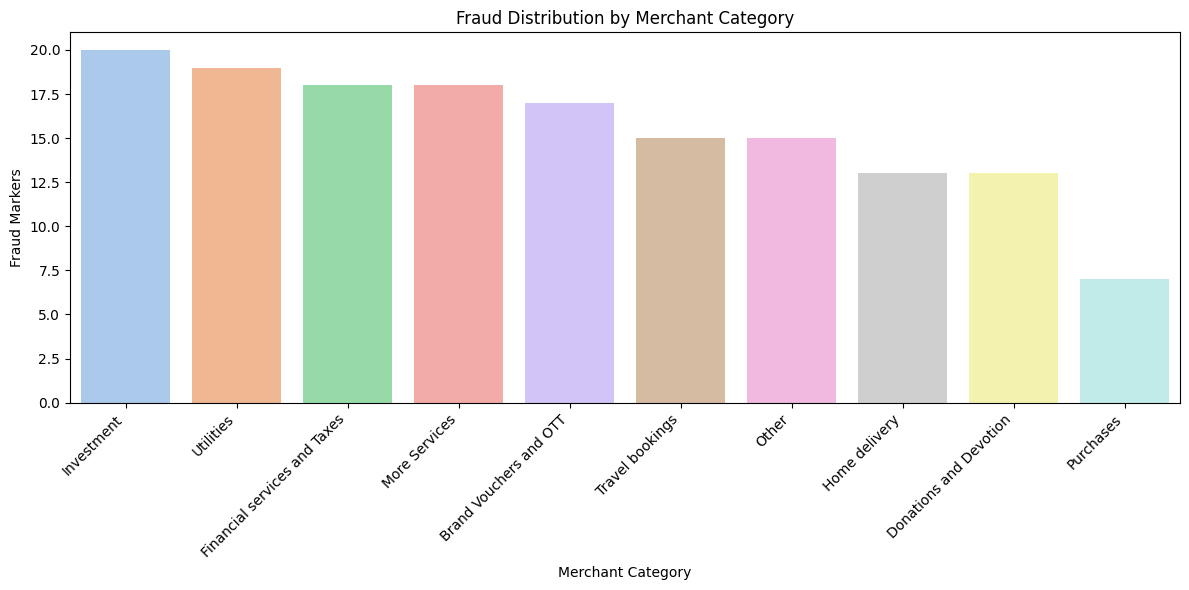

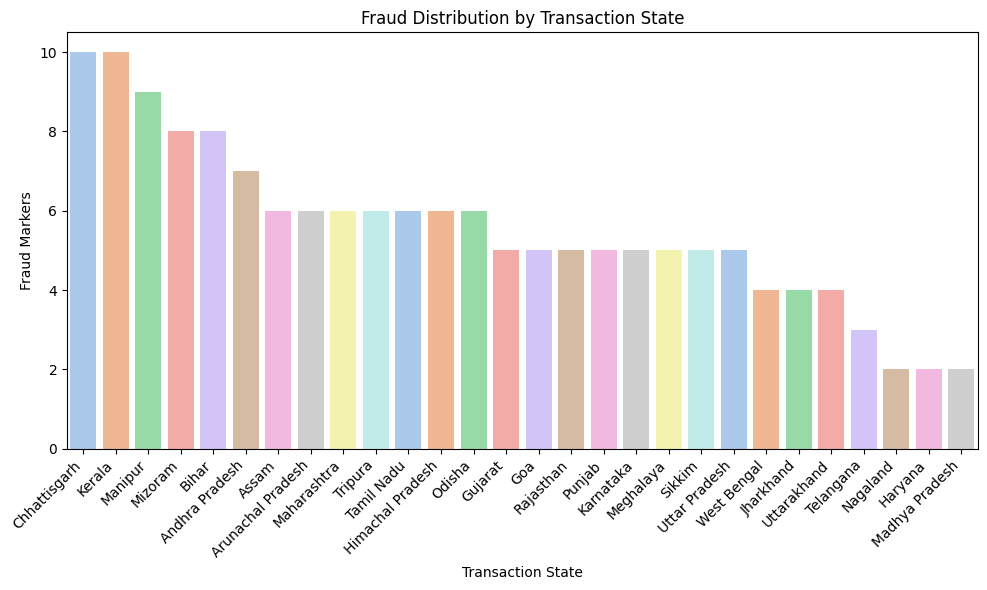

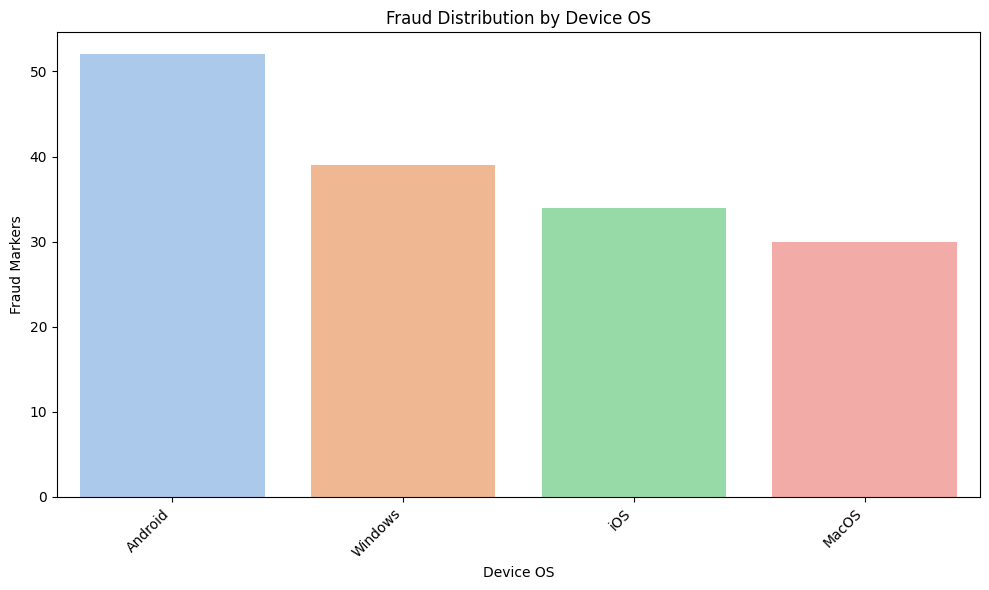

In [36]:
# Visualizing Fraud Data


import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Fraud distribution by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_Type', palette='pastel', order=fraud['Transaction_Type'].value_counts().index)
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 2: Fraud distribution by Payment Gateway
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Payment_Gateway', palette='pastel', order=fraud['Payment_Gateway'].value_counts().index)
plt.title('Fraud Distribution by Payment Gateway')
plt.xlabel('Payment Gateway')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 3: Fraud distribution by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud, x='Merchant_Category', palette='pastel', order=fraud['Merchant_Category'].value_counts().index)
plt.title('Fraud Distribution by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 7: Relationship between Transaction_State and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_State', palette='pastel', order=fraud['Transaction_State'].value_counts().index)
plt.title('Fraud Distribution by Transaction State')
plt.xlabel('Transaction State')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 8: Relationship between Device_OS and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Device_OS', palette='pastel', order=fraud['Device_OS'].value_counts().index)
plt.title('Fraud Distribution by Device OS')
plt.xlabel('Device OS')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [37]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          155 non-null    object 
 1   Time                          155 non-null    object 
 2   Transaction_Type              155 non-null    object 
 3   Payment_Gateway               155 non-null    object 
 4   Transaction_City              155 non-null    object 
 5   Transaction_State             155 non-null    object 
 6   Transaction_Status            155 non-null    object 
 7   Device_OS                     155 non-null    object 
 8   Transaction_Frequency         155 non-null    int64  
 9   Merchant_Category             155 non-null    object 
 10  Transaction_Channel           155 non-null    object 
 11  Transaction_Amount_Deviation  155 non-null    float64
 12  Days_Since_Last_Transaction   155 non-null    int64  
 13  amount    

In [38]:
# Statistical analysis for feature importance :
    

from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_analysis(data, target_variable, alpha=0.05):
    categorical_vars = data.select_dtypes(include=['object'])
    results = []

    for cat_var in categorical_vars:
        contingency_table = pd.crosstab(data[cat_var], data[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        if p >= alpha:
            comment = "No significant association with " + target_variable
            recommendation = "Can be removed"
        else:
            comment = "Significant association with " + target_variable
            recommendation = ""

        results.append([cat_var, chi2, p, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'Chi-square statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = chi_square_analysis(data , 'fraud')
results_df

,Column,Chi-square statistic,p-value,Comment,Recommendation
0,Date,297.976192,0.538422,No significant association with fraud,Can be removed
1,Time,636.021532,0.536964,No significant association with fraud,Can be removed
2,Transaction_Type,2.216333,0.898766,No significant association with fraud,Can be removed
3,Payment_Gateway,1.129164,0.997293,No significant association with fraud,Can be removed
4,Transaction_City,272.281348,0.618284,No significant association with fraud,Can be removed
5,Transaction_State,14.979792,0.969714,No significant association with fraud,Can be removed
6,Transaction_Status,1.426220,0.490118,No significant association with fraud,Can be removed
7,Device_OS,3.914591,0.270836,No significant association with fraud,Can be removed
8,Merchant_Category,3.867471,0.919917,No significant association with fraud,Can be removed
9,Transaction_Channel,4.464418,0.107291,No significant association with fraud,Can be removed


In [39]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status', 'Time', 'Date', 'Device_OS', 'Transaction_Channel']

data.drop(columns=columns_to_drop, inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_City   647 non-null    object 
 3   Transaction_State  647 non-null    object 
 4   Merchant_Category  647 non-null    object 
 5   amount             647 non-null    float64
 6   fraud              647 non-null    int64  
 7   Year               647 non-null    int32  
 8   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 43.1+ KB


ANOVA-test:
- Scenario: You can use a ANOVA-test to to determine whether there is a significant difference between fraud and non-fraud transactions.

In [41]:
from scipy.stats import f_oneway
import pandas as pd

def anova_analysis(df, target_variable, alpha=0.05):
    numerical_vars = df.select_dtypes(include=['int64', 'float64','int32'])
    results = []

    for num_var in numerical_vars:
        groups = df.groupby(target_variable)[num_var].apply(list)
        f_statistic, p_value = f_oneway(*groups)

        if p_value < alpha:
            comment = f"Significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = ""
        else:
            comment = f"No significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = "Can be removed"

        results.append([num_var, f_statistic, p_value, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'F-statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = anova_analysis(data, 'fraud')
results_df

,Column,F-statistic,p-value,Comment,Recommendation
0,amount,165.938537,5.933877e-34,Significant difference in amount between fraud...,
1,fraud,inf,0.000000e+00,Significant difference in fraud between fraud ...,
2,Year,0.240815,6.237848e-01,No significant difference in Year between frau...,Can be removed


In [42]:
data.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'amount', 'fraud', 'Year',
       'Month'],
      dtype='object')

In [43]:
# Encoding and scaling

data = data.copy()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_City   647 non-null    object 
 3   Transaction_State  647 non-null    object 
 4   Merchant_Category  647 non-null    object 
 5   amount             647 non-null    float64
 6   fraud              647 non-null    int64  
 7   Year               647 non-null    int32  
 8   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 43.1+ KB


In [45]:
# Converting Year column to object
data['Year'] = data['Year'].astype('object')

In [46]:
# Extracting categorical columns from data
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year','Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [48]:
# Numerical columns
non_ordinal = ['Transaction_Type', 'Payment_Gateway', 'Transaction_City','Transaction_State','Merchant_Category']

# performing one hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Convert boolean columns to integers
data = data.astype(int)

In [49]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,396,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,121,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,106,1,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3611,1,1,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,374,1,0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
data.dtypes

amount                               int64
fraud                                int64
Year                                 int64
Month                                int64
Transaction_Type_Bill Payment        int64
                                     ...  
Merchant_Category_More Services      int64
Merchant_Category_Other              int64
Merchant_Category_Purchases          int64
Merchant_Category_Travel bookings    int64
Merchant_Category_Utilities          int64
Length: 334, dtype: object

In [51]:
data.shape

(647, 334)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into 'fraud' and 'non-fraud' classes
fraud_data = data[data['fraud'] == 1]
non_fraud_data = data[data['fraud'] == 0]

# Sample each class separately while maintaining proportions
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

# Combine the sampled data back together
data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])

In [53]:
# Model Building


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (259, 333)
Test features shape: (65, 333)
Training target shape: (259,)
Test target shape: (65,)


In [54]:
# Model performance before data balancing. i.e, with RAW data


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Assuming you have already loaded your data into X and y

# Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.876923,0.785714,0.6875,0.733333,0.813138
1,RandomForestClassifier,0.923077,1.000000,0.6875,0.814815,0.843750
2,GradientBoostingClassifier,0.938462,0.875000,0.8750,0.875000,0.917092
3,XGBClassifier,0.969231,1.000000,0.8750,0.933333,0.937500


Balancing the data : There are two well-known techniques to deal with highly imbalanced datasets:
- Undersampling technique
- Oversampling(SMOTE)
- We attempted the undersampling. However, due to its poor performance, we moved on to oversampling technique(SMOTE)

In [55]:
# Oversampling (SMOTE)

X = data.drop('fraud',axis=1)

Y = data['fraud']

In [56]:
X.shape

(324, 333)

In [57]:
Y.shape

(324,)

In [59]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)

# Print the count of each class after oversampling
print(y_res.value_counts())

fraud
1    246
0    246
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 1. Prepare your original data
# X, y = ... # Your features and target

# 2. Balance the data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 3. Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# 4. Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# 5. Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
}

# 6. Train and evaluate
results = []
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    results.append(metrics)

# 7. Display results
df_results = pd.DataFrame(results)
print(df_results)


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:
                        Model  Accuracy  Precision    Recall  F1 Score  \
0      DecisionTreeClassifier  0.898990   0.854545  0.959184  0.903846   
1      RandomForestClassifier  0.949495   0.958333  0.938776  0.948454   
2  GradientBoostingClassifier  0.939394   0.957447  0.918367  0.937500   
3               XGBClassifier  0.949495   0.958333  0.938776  0.948454   

   ROC AUC Score  
0       0.899592  
1       0.949388  
2       0.939184  
3       0.949388  


Performance post hyperparameter tuning
Best hyperparameters for Decision Tree: {'max_depth': 50, 'min_samples_split': 10}
Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [63]:
# Conclusion:

# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier on the entire dataset
XGBoost_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
XGBoost_model.fit(X_res, y_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
import pickle

# File path for saving the pickle file
pickle_file_path = "Detection updated.pkl"

# Save the trained XGBoost model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(XGBoost_model, file)